In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(["UDI","Product ID"],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


TWF, HDF, PWF, OSF, RNF represent the failure type, so we will need to combine them in a single feature to be our target

In [5]:
failure_type_mapping = {
    'TWF': 1,
    'HDF': 2,
    'PWF': 3,
    'OSF': 4,
    'RNF': 5
}

def reverse_one_hot_encoding(row):
    if row['Machine failure'] == 0:
        return 0
    else:
        for col in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
            if row[col] == 1:
                return failure_type_mapping[col]
        return 0
    
df['Failure type'] = df.apply(reverse_one_hot_encoding, axis=1)

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure type
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


In [6]:
df = df.drop(["TWF","HDF","PWF","OSF","RNF"],axis=1)
print(df)

     Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4             

In [7]:
df['Failure type'].nunique()

5

In [8]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.086100
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.499912
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,4.000000


In [9]:
# Converting temperature to C from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [10]:
df.columns

Index(['Type', 'Air temperature [°C]', 'Process temperature [°C]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Failure type'],
      dtype='object')

In [11]:
for col in df[['Type','Machine failure','Failure type']]:
    print(df[col].value_counts()) 
    print("----"*4)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
----------------
0    9661
1     339
Name: Machine failure, dtype: int64
----------------
0    9670
2     115
3      91
4      78
1      46
Name: Failure type, dtype: int64
----------------


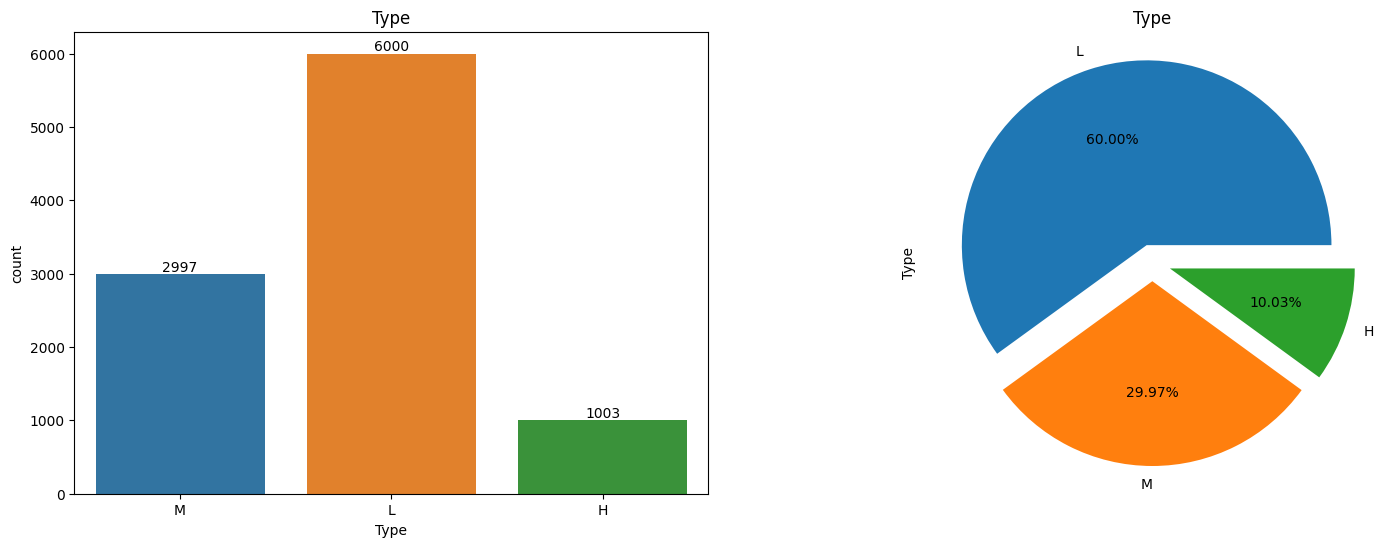

In [12]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type")
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%');
ax.set_title(label = "Type");

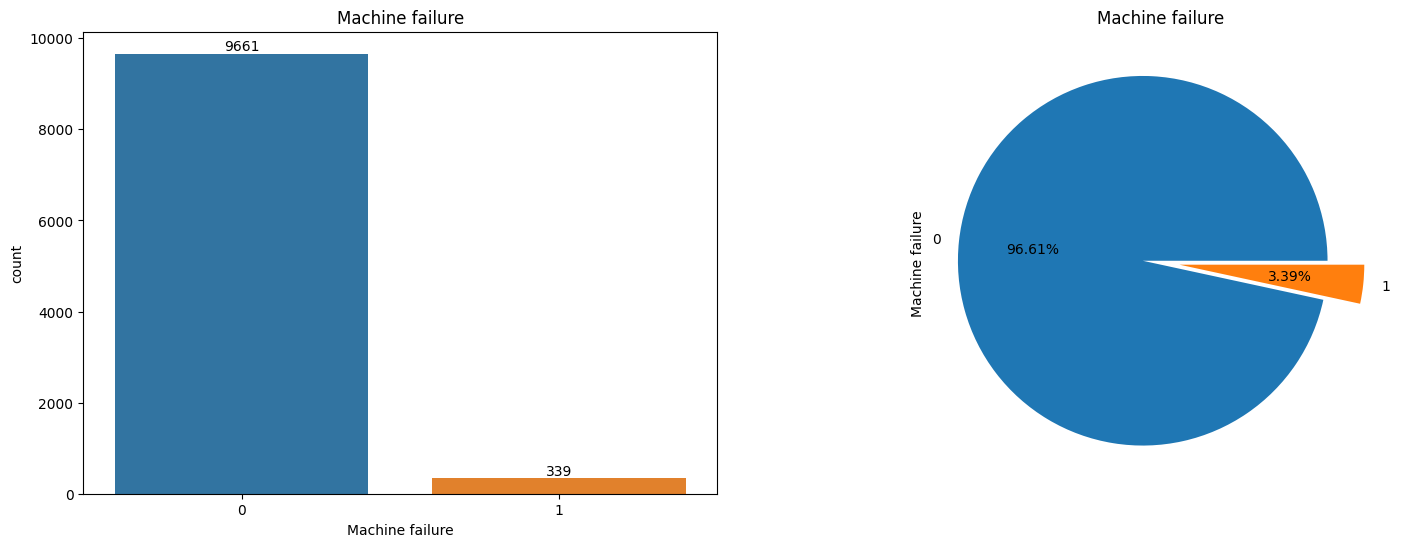

In [13]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Machine failure', data=df)
ax.bar_label(ax.containers[0])
plt.title("Machine failure")
ax =plt.subplot(1,2,2)
ax=df['Machine failure'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%');
ax.set_title(label = "Machine failure");

Training

In [14]:
type_mapping = {
    'L': 1,
    'M': 2,
    'H': 3
}

def encode_type(row):
    for col in row['Type']:
        return type_mapping[col]

df['Type'] = df.apply(encode_type, axis=1)

In [15]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Failure type
0,2,25.95,36.45,1551,42.8,0,0,0
1,1,26.05,36.55,1408,46.3,3,0,0
2,1,25.95,36.35,1498,49.4,5,0,0
3,1,26.05,36.45,1433,39.5,7,0,0
4,1,26.05,36.55,1408,40.0,9,0,0


In [16]:
X = df.drop(columns=["Failure type", "Machine failure"] , axis=1)
y = df["Failure type"]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

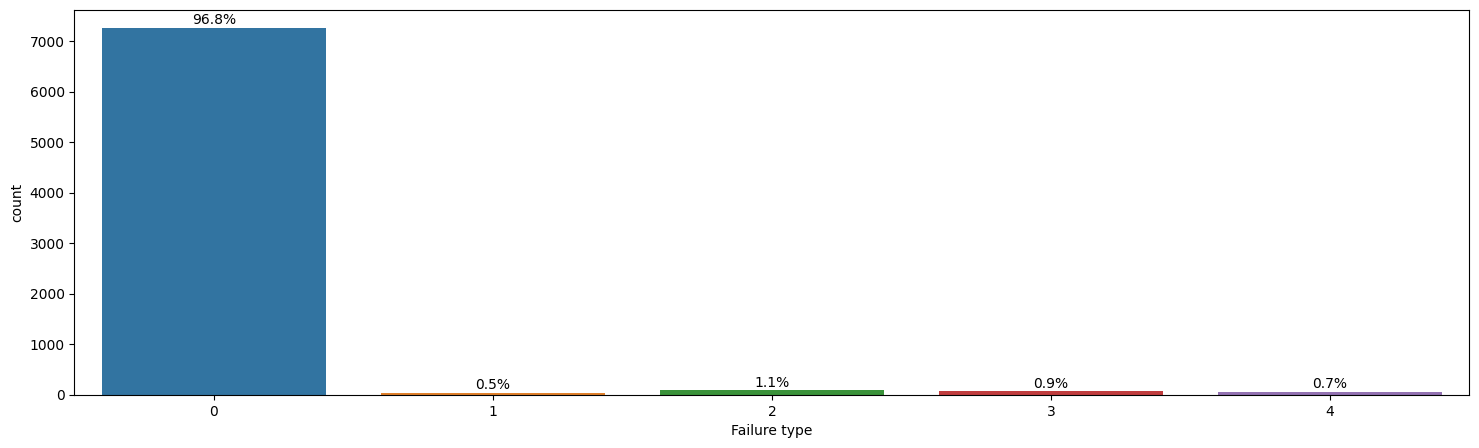

In [18]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train)
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

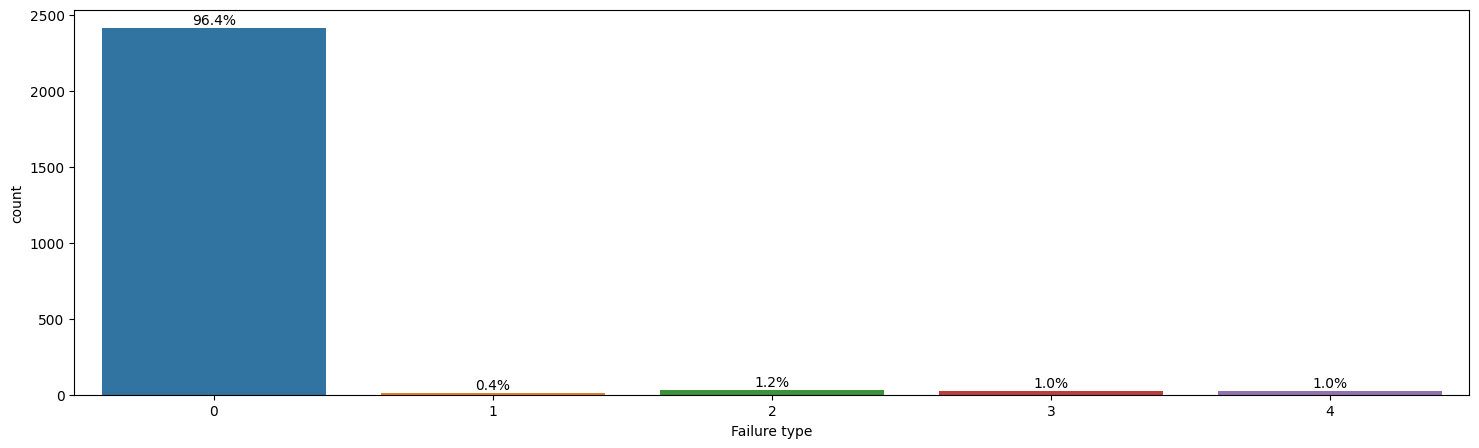

In [19]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test)
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

Distribution of train and test data is very similar so we can procceed

Training Accuracy    : 96.75 %
Model Accuracy Score : 96.68 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2411
           1       0.00      0.00      0.00         9
           2       0.17      0.06      0.09        31
           3       0.00      0.00      0.00        24
           4       0.69      0.36      0.47        25

    accuracy                           0.97      2500
   macro avg       0.37      0.28      0.31      2500
weighted avg       0.95      0.97      0.96      2500



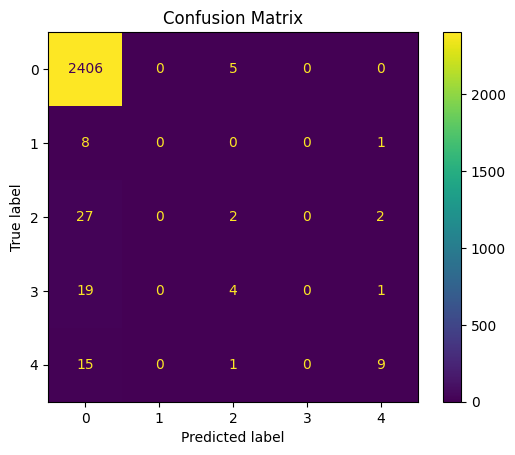

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.32 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2411
           1       0.08      0.11      0.10         9
           2       0.90      0.87      0.89        31
           3       0.72      0.75      0.73        24
           4       0.83      0.76      0.79        25

    accuracy                           0.98      2500
   macro avg       0.70      0.70      0.70      2500
weighted avg       0.98      0.98      0.98      2500



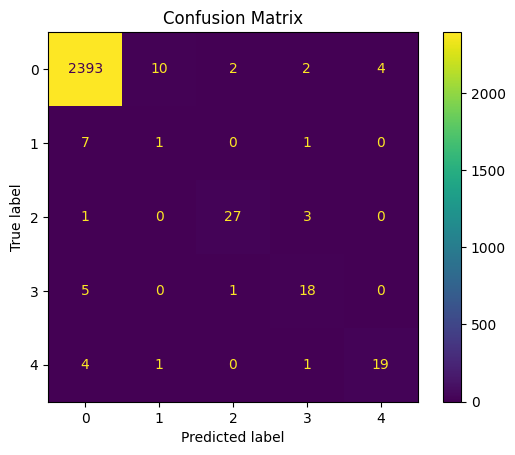

In [21]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.24 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.00      0.00      0.00         9
           2       1.00      0.68      0.81        31
           3       0.68      0.62      0.65        24
           4       0.92      0.48      0.63        25

    accuracy                           0.98      2500
   macro avg       0.72      0.56      0.62      2500
weighted avg       0.98      0.98      0.98      2500



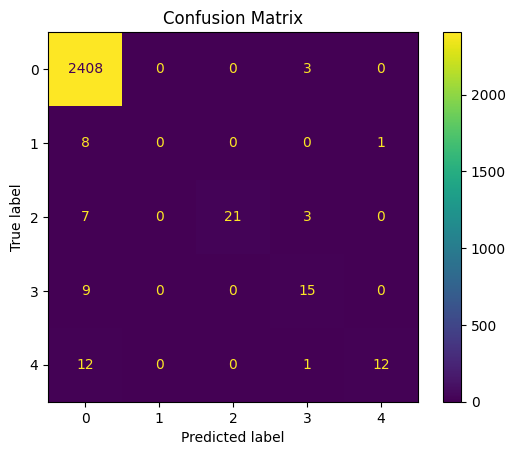

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

Accuracy here as a metric alone is not enough as the data is not balanced, we might need to over sample the minority classes

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')

X_res, y_res = smote.fit_resample(X_train, y_train)


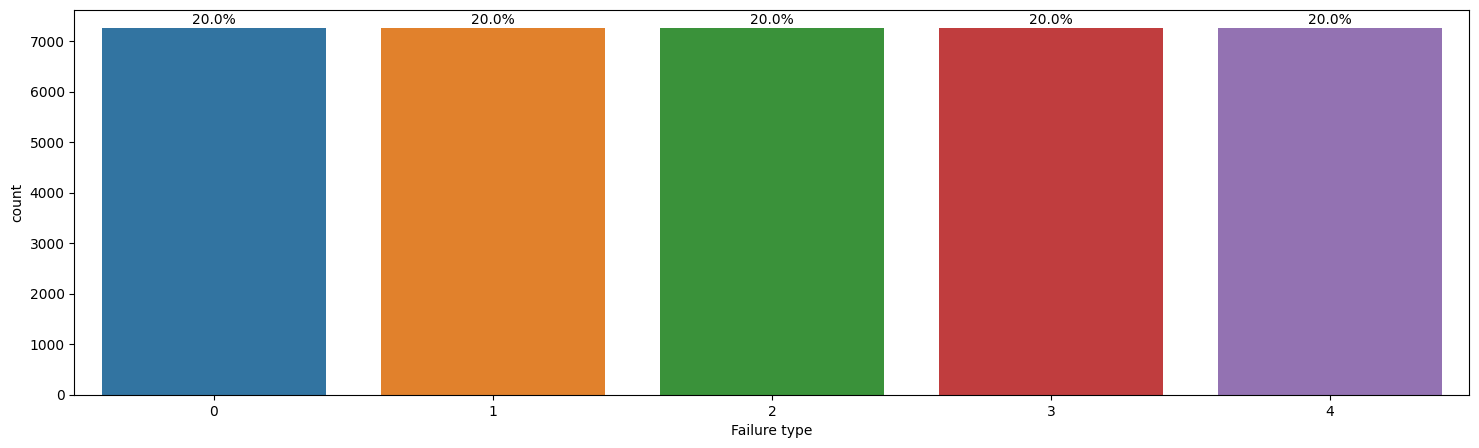

In [28]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_res)
t= len(y_res)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

Classes are now balanced we could try training again

Training Accuracy    : 82.15 %
Model Accuracy Score : 70.6 %
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82      2411
           1       0.03      0.89      0.07         9
           2       0.11      0.84      0.19        31
           3       0.06      0.67      0.10        24
           4       0.48      0.96      0.64        25

    accuracy                           0.71      2500
   macro avg       0.34      0.81      0.37      2500
weighted avg       0.97      0.71      0.80      2500



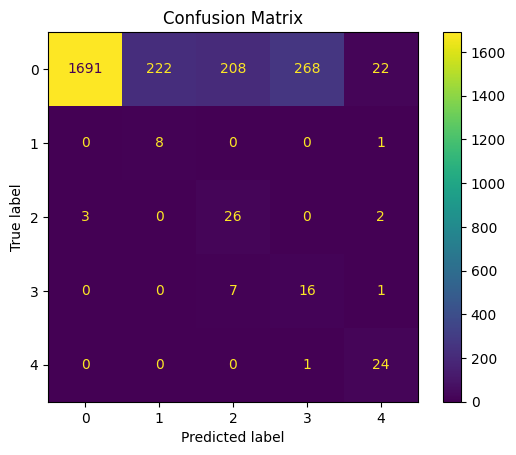

In [29]:
logregOS = LogisticRegression()
logregOS.fit(X_res, y_res)
y_pred_lrOS = logregOS.predict(X_test)

log_trainOS = round(logregOS.score(X_res, y_res) * 100, 2)
log_accuracyOS = round(accuracy_score(y_pred_lrOS, y_test) * 100, 2)


print("Training Accuracy    :",log_trainOS ,"%")
print("Model Accuracy Score :",log_accuracyOS ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_lrOS))
plot_confusion_matrix(logregOS, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.56 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2411
           1       0.09      0.44      0.15         9
           2       0.71      0.77      0.74        31
           3       0.67      0.58      0.62        24
           4       0.65      0.60      0.63        25

    accuracy                           0.97      2500
   macro avg       0.62      0.68      0.62      2500
weighted avg       0.98      0.97      0.97      2500



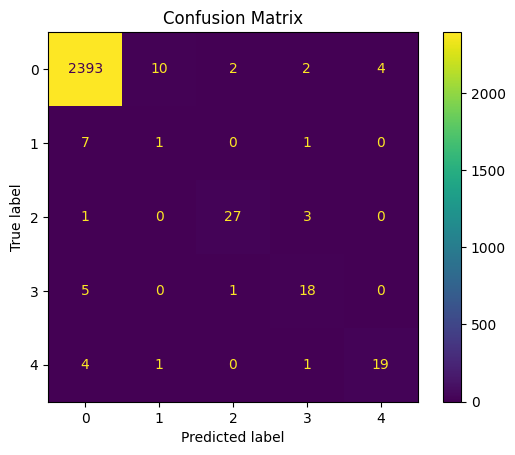

In [30]:
decisionOS = DecisionTreeClassifier()
decisionOS.fit(X_res, y_res)
y_pred_decOS = decisionOS.predict(X_test)

decision_trainOS = round(decisionOS.score(X_res, y_res) * 100, 2)
decision_accuracyOS = round(accuracy_score(y_pred_decOS, y_test) * 100, 2)

print("Training Accuracy    :",decision_trainOS ,"%")
print("Model Accuracy Score :",decision_accuracyOS ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_decOS))
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.68 %
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2411
           1       0.07      0.33      0.11         9
           2       0.88      0.74      0.81        31
           3       0.65      0.71      0.68        24
           4       0.71      0.80      0.75        25

    accuracy                           0.97      2500
   macro avg       0.66      0.71      0.67      2500
weighted avg       0.98      0.97      0.97      2500



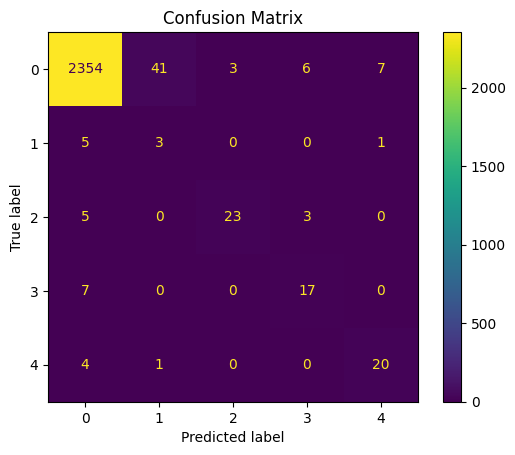

In [31]:
random_forestOS = RandomForestClassifier(n_estimators=100)
random_forestOS.fit(X_res, y_res)
y_pred_rfOS = random_forestOS.predict(X_test)
random_forestOS.score(X_res, y_res)

random_forest_trainOS = round(random_forestOS.score(X_res, y_res) * 100, 2)
random_forest_accuracyOS = round(accuracy_score(y_pred_rfOS, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_trainOS ,"%")
print("Model Accuracy Score :",random_forest_accuracyOS ,"%")
print("Classification_Report: \n",classification_report(y_test,y_pred_rfOS))
plot_confusion_matrix(random_forestOS, X_test, y_test);
plt.title('Confusion Matrix');

Oversampling leads to better learning as we increased precision and recall

In [32]:
import pickle

with open('model.pkl', 'wb') as model_file:
    pickle.dump(random_forestOS, model_file)